# **보간법 & 보외법**

---



'mpg' dataset 불러오기

In [39]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('mpg')

### **'mpg' columns**

> 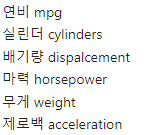



In [2]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
# 결측치 확인
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# 결측치 제거
df.dropna(inplace=True)

In [21]:
df_x = df[['cylinders', 'displacement', 'horsepower', 'weight']]
# df_y = df['mpg']

결측치 30개 만들기 (각 index에 nan 넣기)

In [22]:
# 결측치 임의로 만들기
msv = np.random.randint(0, 389, size=30)

In [23]:
msv

array([152, 127, 215,  18, 383, 338, 263, 204, 334, 128, 363,  52, 108,
       291, 107, 264, 339, 201, 278, 331, 373, 341, 327,   6,  86,  92,
       300, 268,  22, 119])

In [24]:
df_x.iloc[msv] = np.nan

In [25]:
df_x.isna().sum()

cylinders       30
displacement    30
horsepower      30
weight          30
dtype: int64

In [26]:
# y값과 연결
df_s1 = pd.concat([df_x, df['mpg']], axis=1)

In [27]:
df_s1

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


<Axes: >

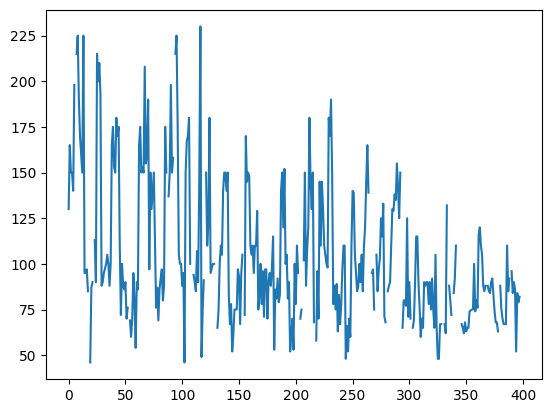

In [28]:
df_s1['horsepower'].plot()

### 평균값으로 대체

In [29]:
df_x['cylinders'].mean()

5.535911602209945

In [30]:
df_x['displacement'].mean()

197.92955801104972

In [31]:
df_x['horsepower'].mean()

105.50552486187846

In [32]:
df_x['weight'].mean()

3011.3259668508285

In [33]:
df_s1['cylinders'] = df_s1['cylinders'].fillna(df_x['cylinders'].mean())
df_s1['displacement'] = df_s1['displacement'].fillna(df_x['displacement'].mean())
df_s1['horsepower'] = df_s1['horsepower'].fillna(df_x['horsepower'].mean())
df_s1['weight'] = df_s1['weight'].fillna(df_x['weight'].mean())

In [34]:
df_s1.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_s1.drop('mpg', axis=1)
y = df_s1['mpg']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# 회귀분석에 필요한 모듈
import statsmodels.api as sm

In [42]:
# 회귀분석 (다중회귀)
fit_train1 = sm.OLS(y_train, X_train)

In [43]:
fit_train1 = fit_train1.fit()

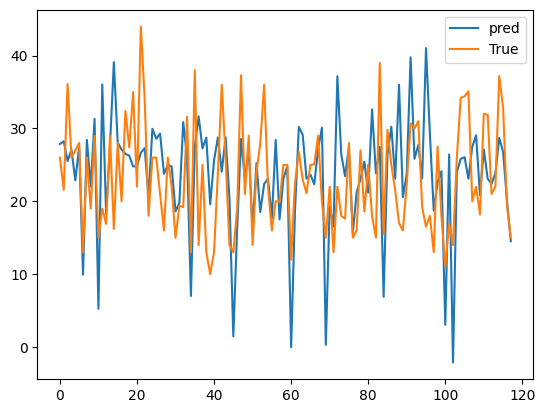

In [44]:
# 예측
plt.plot(np.array(fit_train1.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [45]:
# MSE
from sklearn.metrics import mean_squared_error

In [46]:
mse = mean_squared_error(y_test, fit_train1.predict(X_test))

In [47]:
mse

65.20721792885415

### 보간법으로 대체

In [48]:
df_s2 = pd.concat([df_x, df['mpg']], axis=1)

In [49]:
df_s2['cylinders'] = df_s2['cylinders'].interpolate(method='linear')
df_s2['displacement'] = df_s2['displacement'].interpolate(method='linear')
df_s2['horsepower'] = df_s2['horsepower'].interpolate(method='linear')
df_s2['weight'] = df_s2['weight'].interpolate(method='linear')

In [50]:
df_s2.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [51]:
X2 = df_s2.drop('mpg', axis=1)
y2 = df_s2['mpg']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [53]:
fit_train2 = sm.OLS(y_train, X_train)

In [54]:
fit_train2 = fit_train2.fit()

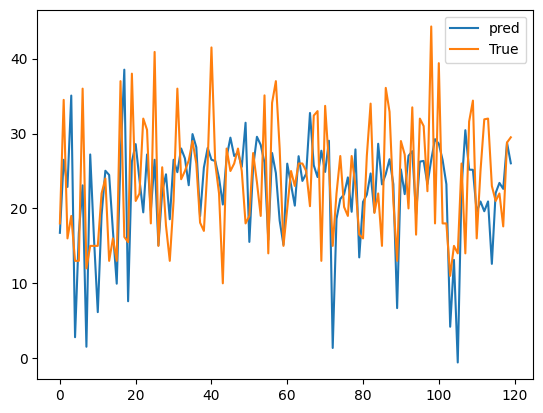

In [55]:
# 예측
plt.plot(np.array(fit_train2.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [56]:
mse2 = mean_squared_error(y_test, fit_train2.predict(X_test))

In [57]:
mse2

60.13432435888952

선형보간으로 진행하니 실제 평균값으로 대체하는 것보다 낮은 mse값 나옴

### iterativeImputer

In [58]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

In [59]:
df_s3 = pd.concat([df_x, df['mpg']], axis=1)

In [60]:
df_s3 = imputer.fit_transform(df_s3)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array로 만들어짐

In [61]:
df_s3

array([[   8.        ,  307.        ,  130.        , 3504.        ,
          18.        ],
       [   8.        ,  350.        ,  165.        , 3693.        ,
          15.        ],
       [   8.        ,  318.        ,  150.        , 3436.        ,
          18.        ],
       ...,
       [   5.48900949,  194.99913469,  104.45280411, 2985.62207175,
          23.6       ],
       [   4.12421333,  109.72727367,   73.81987226, 2237.66905342,
          34.5       ],
       [   5.56413588,  199.6929986 ,  106.13902054, 3026.79379753,
          23.        ]])

In [62]:
# DataFrame으로 변환
df_s3 = pd.DataFrame(df_s3)

In [64]:
df_s3

,0,1,2,3,4
0,8.000000,307.000000,130.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,3693.000000,15.0
2,8.000000,318.000000,150.000000,3436.000000,18.0
3,8.000000,304.000000,150.000000,3433.000000,16.0
4,8.000000,302.000000,140.000000,3449.000000,17.0
...,...,...,...,...,...
393,5.814557,215.339212,111.759742,3164.032883,21.0
394,3.322865,59.659392,55.833564,1798.503978,40.9
395,5.489009,194.999135,104.452804,2985.622072,23.6
396,4.124213,109.727274,73.819872,2237.669053,34.5


In [63]:
df_s3.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [65]:
df_s3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']

In [66]:
df_s3

,cylinders,displacement,horsepower,weight,mpg
0,8.000000,307.000000,130.000000,3504.000000,18.0
1,8.000000,350.000000,165.000000,3693.000000,15.0
2,8.000000,318.000000,150.000000,3436.000000,18.0
3,8.000000,304.000000,150.000000,3433.000000,16.0
4,8.000000,302.000000,140.000000,3449.000000,17.0
...,...,...,...,...,...
393,5.814557,215.339212,111.759742,3164.032883,21.0
394,3.322865,59.659392,55.833564,1798.503978,40.9
395,5.489009,194.999135,104.452804,2985.622072,23.6
396,4.124213,109.727274,73.819872,2237.669053,34.5


In [67]:
X3 = df_s3.drop('mpg', axis=1)
y3 = df_s3['mpg']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [69]:
fit_train3 = sm.OLS(y_train, X_train)

In [70]:
fit_train3 = fit_train3.fit()

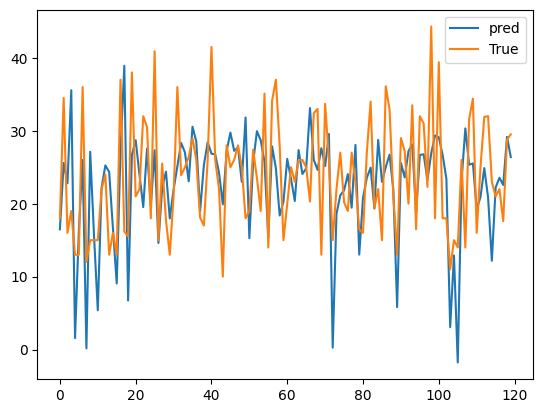

In [72]:
# 예측
plt.plot(np.array(fit_train3.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [73]:
mse3 = mean_squared_error(y_test, fit_train3.predict(X_test))

In [74]:
mse3

59.34003729098357

In [76]:
# 결측치 대체에 어떤 방법이 가장 좋을까..?
print('단순평균대치법 :', mse)
print('선형보간법 :', mse2)
print('iterative imputer :', mse3)

단순평균대치법 : 65.20721792885415
선형보간법 : 60.13432435888952
iterative imputer : 59.34003729098357


**데이터 분포 & 관계에 따라 항상 달라짐**

= 단순하게 "어떤 방법이 가장 좋다" 라고 말할 수 없음

데이터 분포 그래프

<ipython-input-77-c4371f5c2b2f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cylinders'])


<Axes: xlabel='cylinders', ylabel='Density'>

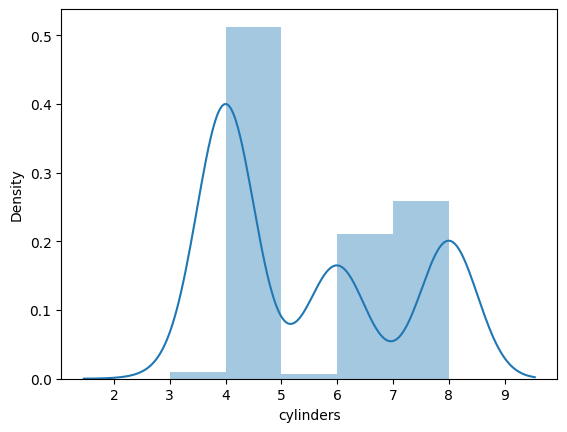

In [77]:
sns.distplot(df['cylinders'])

<ipython-input-83-d68545a63729>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement'])


<Axes: xlabel='displacement', ylabel='Density'>

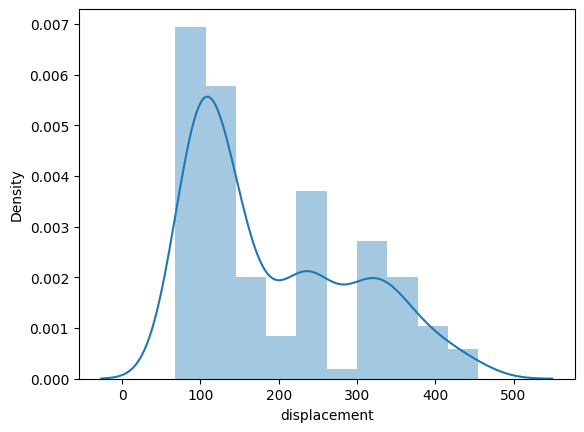

In [83]:
sns.distplot(df['displacement'])

<ipython-input-79-0df883a519cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

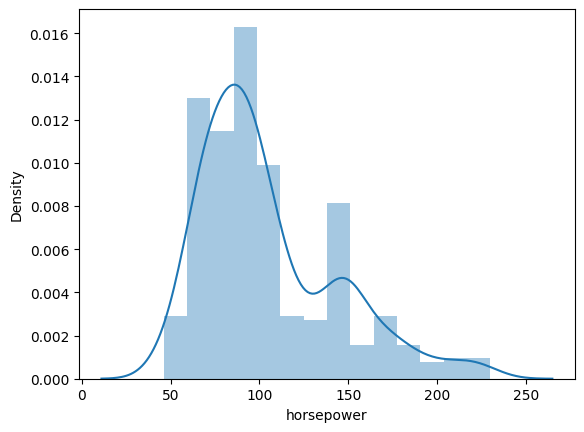

In [79]:
sns.distplot(df['horsepower'])

<ipython-input-84-81c4af9784c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'])


<Axes: xlabel='weight', ylabel='Density'>

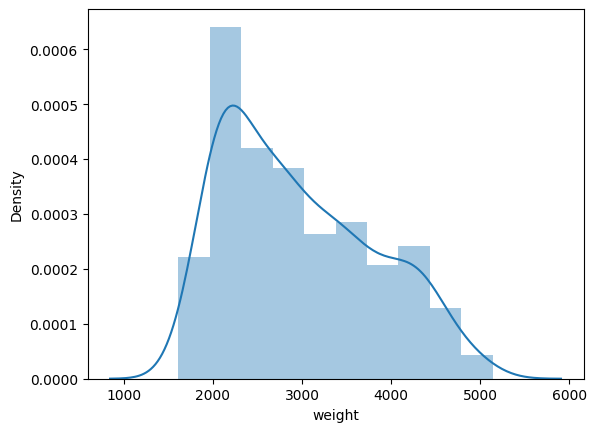

In [84]:
sns.distplot(df['weight'])

<ipython-input-85-72c16914290b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

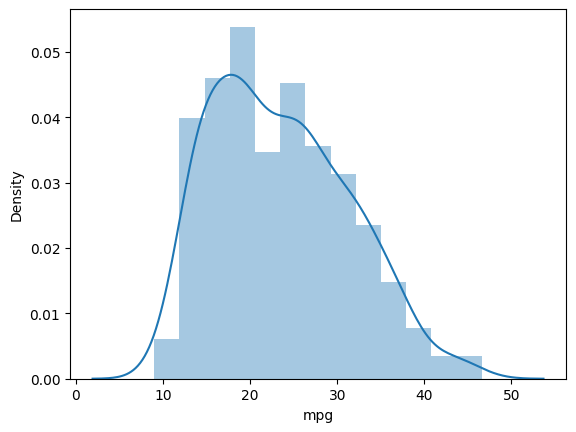

In [85]:
sns.distplot(df['mpg'])